<a href="https://colab.research.google.com/github/athirarama/rama/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import sklearn.metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
#import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv("/content/Company_Data(2).csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
# Checking for the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
data.shape

(400, 11)

In [14]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [16]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [18]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [19]:
data['Sales'].values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [20]:
data['Sales']=pd.cut(np.array([ 9.5 , 11.22, 10.06,  7.4 , 4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low", "Medium", "High"])
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] =label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] =label_encoder.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,2,55,11,0,1
397,Medium,162,26,12,368,159,2,40,18,1,1
398,Medium,100,79,7,284,95,0,50,12,1,1


In [21]:
x = data.iloc[:,1:]
y = data['Sales']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [22]:
y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [23]:
data['Sales'].unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [24]:
data.Sales.value_counts()

Medium    247
Low       102
High       51
Name: Sales, dtype: int64

In [25]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

Splitting data into training and testing data set

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.33,random_state=10)

Building Decision Tree Classifier using Entropy Criteria

In [28]:
model =DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred =model.predict(x_test)

[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]'),
 Text(0.25, 0.625, 'x[4] <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]'),
 Text(0.125, 0.375, 'x[1] <= 32.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [1, 0, 10]'),
 Text(0.375, 0.375, 'x[4] <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.75, 0.625, 'x[5] <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]'),
 Text(0.625, 0.375, 'x[4] <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]'),
 Text(0.5625, 0.125, 'entropy = 0.869\nsamples = 31\nvalue = [22, 0, 9]'),
 Text(0.6875, 0.125, 'entropy = 0.893\nsamples = 26\nvalue = [3, 2, 21]'),
 Text(0.875, 0.375, 

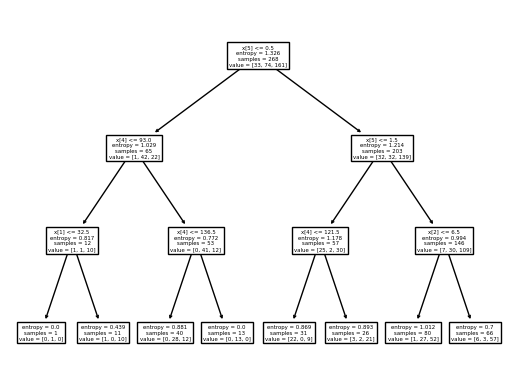

In [29]:
tree.plot_tree(model)

[Text(0.5, 0.875, 'Price <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]\nclass = Low'),
 Text(0.25, 0.625, 'Population <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]\nclass = High'),
 Text(0.125, 0.375, 'CompPrice <= 32.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]\nclass = Low'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = High'),
 Text(0.1875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [1, 0, 10]\nclass = Low'),
 Text(0.375, 0.375, 'Population <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]\nclass = High'),
 Text(0.3125, 0.125, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]\nclass = High'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]\nclass = High'),
 Text(0.75, 0.625, 'Price <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]\nclass = Low'),
 Text(0.625, 0.375, 'Population <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]\nclass = Low'),
 Text(0.56

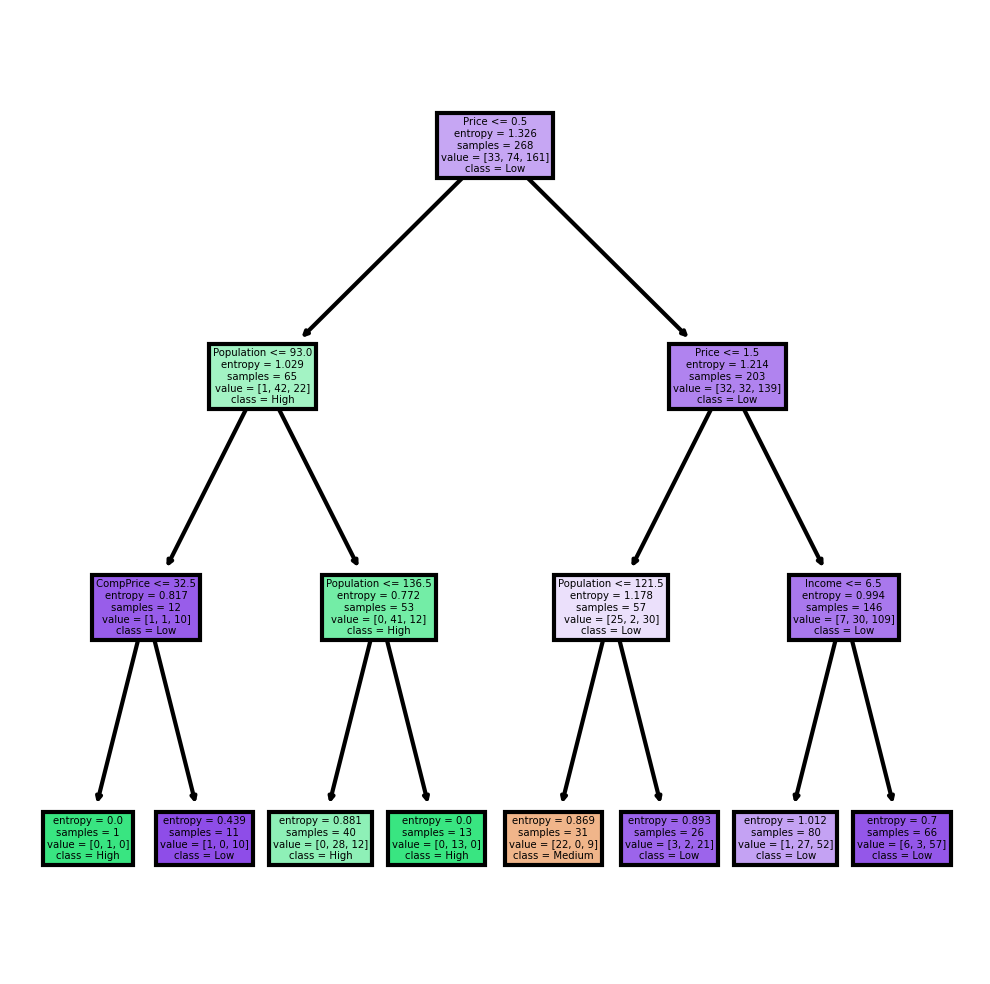

In [30]:
fn= ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

In [31]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
     

In [37]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

53

In [38]:
pd.crosstab(y_test,y_pred)

col_0,High,Low,Medium
Sales,,,
Low,0,11,17
Medium,7,15,64
High,4,0,14


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.36      0.22      0.28        18
         Low       0.42      0.39      0.41        28
      Medium       0.67      0.74      0.71        86

    accuracy                           0.60       132
   macro avg       0.49      0.45      0.46       132
weighted avg       0.58      0.60      0.58       132



In [40]:
data['Sales'] = label_encoder.fit_transform(data['Sales'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [41]:
data =np.array(data)
x=data[:,1:]
y=data[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=10)
x_test

array([[106,  33,  20, ...,  12,   1,   1],
       [132, 118,  12, ...,  14,   1,   1],
       [133, 103,  14, ...,  17,   1,   1],
       ...,
       [108,  38,   0, ...,  14,   0,   0],
       [131, 113,   0, ...,  14,   1,   0],
       [125,  67,   0, ...,  11,   1,   0]])

In [42]:
from  sklearn.tree import DecisionTreeRegressor

[Text(0.5040680473372781, 0.9615384615384616, 'x[5] <= 1.5\nsquared_error = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(0.26072485207100593, 0.8846153846153846, 'x[4] <= 118.5\nsquared_error = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(0.1301775147928994, 0.8076923076923077, 'x[5] <= 0.5\nsquared_error = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(0.05325443786982249, 0.7307692307692307, 'x[6] <= 53.0\nsquared_error = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(0.023668639053254437, 0.6538461538461539, 'x[4] <= 113.0\nsquared_error = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(0.011834319526627219, 0.5769230769230769, 'squared_error = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(0.03550295857988166, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08284023668639054, 0.6538461538461539, 'x[6] <= 77.0\nsquared_error = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(0.05917159763313609, 0.5769230769230769, 'x[3] <= 49.0\nsquared_error = 0.184\nsamples = 16\nvalue = 1.06

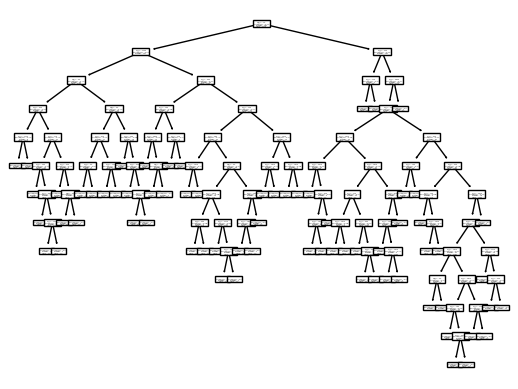

In [43]:
model1 =DecisionTreeRegressor()
model1.fit(x_train,y_train)
y_pred1 =model1.predict(x_test)
tree.plot_tree(model1)

[Text(0.5040680473372781, 0.9615384615384616, 'ShelveLoc <= 1.5\nsquared_error = 0.496\nsamples = 268\nvalue = 1.478'),
 Text(0.26072485207100593, 0.8846153846153846, 'Price <= 118.5\nsquared_error = 0.594\nsamples = 122\nvalue = 1.213'),
 Text(0.1301775147928994, 0.8076923076923077, 'ShelveLoc <= 0.5\nsquared_error = 0.729\nsamples = 59\nvalue = 0.983'),
 Text(0.05325443786982249, 0.7307692307692307, 'Age <= 53.0\nsquared_error = 0.307\nsamples = 30\nvalue = 1.4'),
 Text(0.023668639053254437, 0.6538461538461539, 'Price <= 113.0\nsquared_error = 0.109\nsamples = 8\nvalue = 1.875'),
 Text(0.011834319526627219, 0.5769230769230769, 'squared_error = 0.0\nsamples = 7\nvalue = 2.0'),
 Text(0.03550295857988166, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08284023668639054, 0.6538461538461539, 'Age <= 77.0\nsquared_error = 0.267\nsamples = 22\nvalue = 1.227'),
 Text(0.05917159763313609, 0.5769230769230769, 'Population <= 49.0\nsquared_error = 0.184\nsamples = 

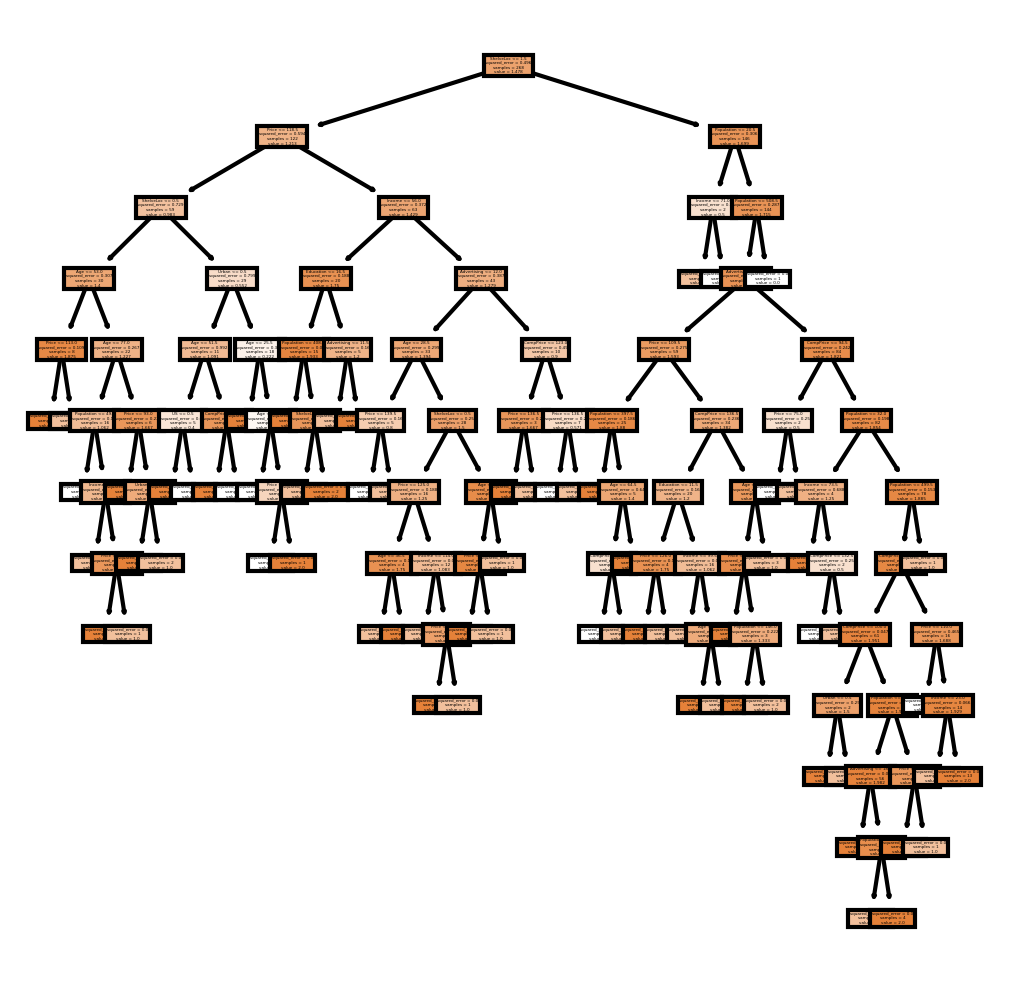

In [44]:
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model1,feature_names=fn,
               class_names=cn,
               filled= True)

In [45]:
y_pred1

array([1., 2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 0., 1., 2., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 1., 2., 1., 0., 2., 2., 2., 0., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 0., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 2.,
       0., 2., 0., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1.])

In [47]:
df = pd.read_csv("/content/Fraud_check.csv")

In [48]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [49]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [50]:
df.shape

(600, 6)

In [51]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [52]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [53]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [55]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [56]:
len(df['Taxable.Income'].unique())

599

In [57]:
df['Taxable.Income'].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [58]:
lrk =[68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519]
rk =pd.Series([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519])

rk[rk <= 30000] =30# herer 30 means Risky high risk to make a Fraud
rk[rk > 30000] =40# here 40 means Safe or Normal Not a Fraud
df['Taxable.Income1'] = rk
df =df.drop(columns =['Taxable.Income'])
len(df['Taxable.Income1'].values)

600

In [60]:
df['Taxable.Income1'].values

array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 40, 30, 40, 40, 40, 30,
       40, 40, 30, 40, 30, 40, 40, 40, 40, 40, 40, 30, 40, 40, 40, 40, 40,
       30, 40, 30, 40, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 40, 40,
       40, 40, 30, 40, 30, 40, 40, 30, 40, 40, 30, 40, 40, 40, 40, 40, 40,
       30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 40, 40, 40, 40, 40,
       30, 40, 30, 40, 30, 40, 40, 40, 30, 30, 40, 30, 40, 30, 40, 40, 40,
       40, 40, 40, 40, 30, 40, 40, 40, 30, 40, 40, 40, 30, 40, 40, 40, 30,
       40, 40, 30, 30, 30, 40, 40, 30, 40, 40, 40, 40, 40, 40, 40, 40, 30,
       40, 30, 40, 40, 30, 40, 40, 30, 40, 40, 40, 40, 40, 40, 40, 40, 30,
       30, 30, 40, 40, 40, 30, 40, 40, 40, 40, 30, 40, 40, 40, 40, 30, 40,
       40, 30, 30, 40, 40, 40, 40, 40, 40, 30, 40, 30, 30, 40, 40, 40, 40,
       40, 30, 40, 40, 40, 40, 40, 30, 40, 30, 40, 40, 30, 40, 40, 40, 40,
       30, 30, 40, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 40,
       40, 40, 40, 40, 40

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=encoder.fit_transform(df['Marital.Status'])
df['Urban']=encoder.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,50047,10,1,40
1,1,0,134075,18,1,40
2,0,1,160205,30,1,40
3,1,2,193264,15,1,40
4,0,1,27533,28,0,40
...,...,...,...,...,...,...
595,1,0,39492,7,1,40
596,1,0,55369,2,1,40
597,0,0,154058,0,1,40
598,1,1,180083,17,0,40


In [62]:
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income1'],
      dtype='object')

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report
df1 =df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
X =df1
y=df['Taxable.Income1']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state= 10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((420, 5), (180, 5), (420,), (180,))

[Text(0.375, 0.875, 'x[2] <= 26849.0\nentropy = 0.712\nsamples = 420\nvalue = [82, 338]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.625, 'x[2] <= 60294.5\nentropy = 0.708\nsamples = 419\nvalue = [81, 338]'),
 Text(0.25, 0.375, 'x[3] <= 27.5\nentropy = 0.56\nsamples = 84\nvalue = [11, 73]'),
 Text(0.125, 0.125, 'entropy = 0.627\nsamples = 70\nvalue = [11, 59]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.375, 'x[2] <= 64532.5\nentropy = 0.739\nsamples = 335\nvalue = [70, 265]'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.875, 0.125, 'entropy = 0.724\nsamples = 328\nvalue = [66, 262]')]

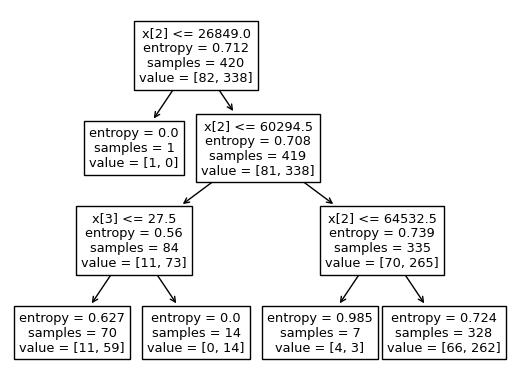

In [64]:
model =DecisionTreeClassifier( criterion='entropy',max_depth =3)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
tree.plot_tree(model)

[Text(0.375, 0.875, 'City.Population <= 26849.0\nentropy = 0.712\nsamples = 420\nvalue = [82, 338]\nclass = 1(Good)'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0(Risky)'),
 Text(0.5, 0.625, 'City.Population <= 60294.5\nentropy = 0.708\nsamples = 419\nvalue = [81, 338]\nclass = 1(Good)'),
 Text(0.25, 0.375, 'Work.Experience <= 27.5\nentropy = 0.56\nsamples = 84\nvalue = [11, 73]\nclass = 1(Good)'),
 Text(0.125, 0.125, 'entropy = 0.627\nsamples = 70\nvalue = [11, 59]\nclass = 1(Good)'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 1(Good)'),
 Text(0.75, 0.375, 'City.Population <= 64532.5\nentropy = 0.739\nsamples = 335\nvalue = [70, 265]\nclass = 1(Good)'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = 0(Risky)'),
 Text(0.875, 0.125, 'entropy = 0.724\nsamples = 328\nvalue = [66, 262]\nclass = 1(Good)')]

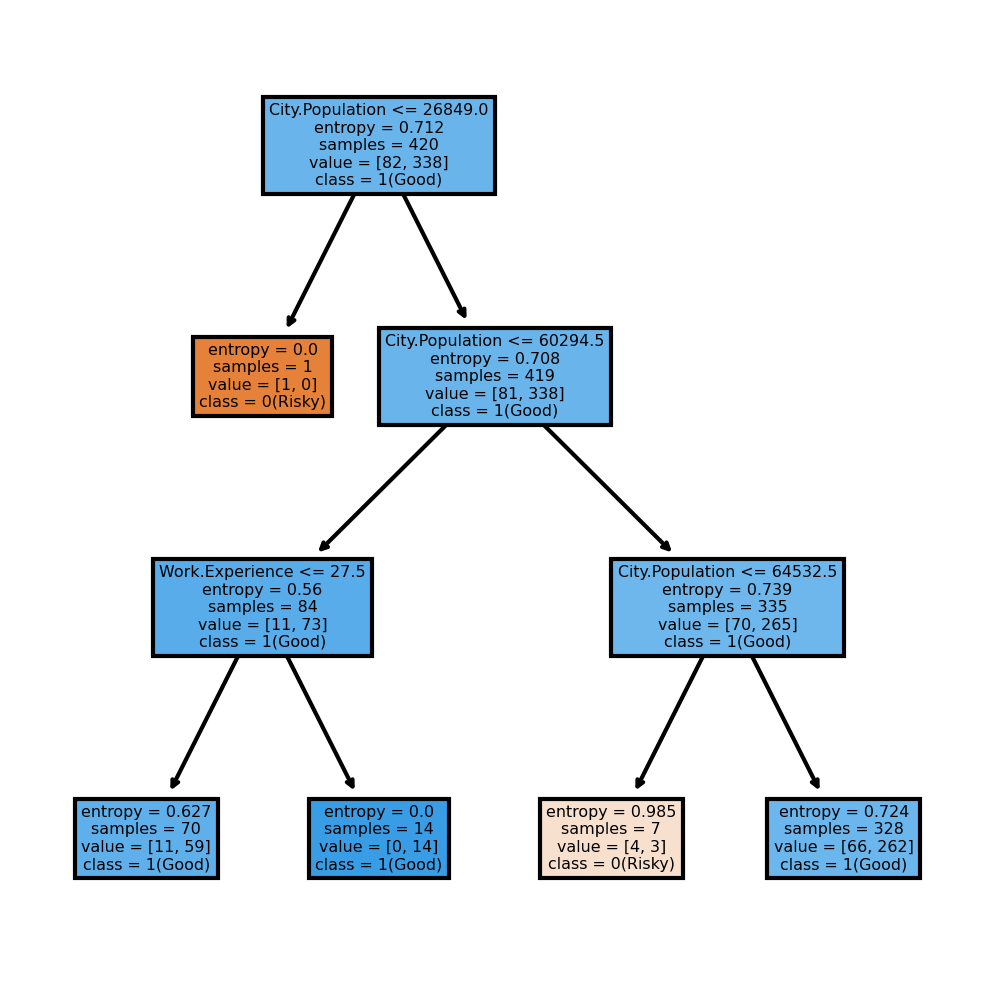

In [65]:
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=["0(Risky)", "1(Good)"]
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

In [66]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.75


In [67]:
pd.crosstab(y_pred,y_test)

Taxable.Income1,30,40
row_0,,
30,1,4
40,41,134


In [68]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

45

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          30       0.20      0.02      0.04        42
          40       0.77      0.97      0.86       138

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180



In [70]:
model1 =DecisionTreeClassifier(criterion='gini',max_depth =3)
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)
accuracy =accuracy_score(y_pred1,y_test)
accuracy

0.75

In [71]:
pd.crosstab(y_pred1,y_test)


Taxable.Income1,30,40
row_0,,
30,1,4
40,41,134


In [72]:
count_misclassified =(y_test != y_pred1).sum()
count_misclassified

45

In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

          30       0.20      0.02      0.04        42
          40       0.77      0.97      0.86       138

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180

